## Sale Analysis Portfolio - Hung "Eric" Tran - erictq96@gmail.com | 347-640-0319

### Import Necessary Python Libraries

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import Counter

### Part 1: Merge 12 months of Sale Data csv files into dataframe.

In [2]:
all_data_months = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]
for file in glob.glob('./Sales_Data/Sales_*_2019.csv'):
    df = pd.read_csv(file)
    all_data_months = all_data_months.append(df,ignore_index=True)
all_data_months.to_csv("all_data.csv", index=False)

#### Read in updated dataframe from the unified all_data.csv file

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Part 2: Clean Data (all NaN & invalid values recorded rows)

#### Drop rows of all NaN values

In [4]:
# Check whether there's NaN data in the dataframe
# nan_data = all_data[all_data.isnull().any(axis=1)]
# nan_data.head()
# Drop rows that all columes have NaN values
all_data = all_data.dropna(how='all')

#### Drop rows of invalid values

In [5]:
# Found that there were strings value in columns that are invalid.
all_data = all_data[all_data["Quantity Ordered"] != "Quantity Ordered"]

# Afterward, double-checked all_data and found no more invalids

#### Convert Columns to the correct type

In [6]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

### Question 1: What were the highest & lowest months for sales? How much were earned those months?

#### Add Month & Sales Columns

In [7]:
# Month Column from Order Date
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])

# Sales Column from Quantity Ordered * Price Each
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Answer Question 1

In [8]:
#Find sales of each month
results_Q1 = all_data.groupby("Month")["Sales"].sum()
print(results_Q1)

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64


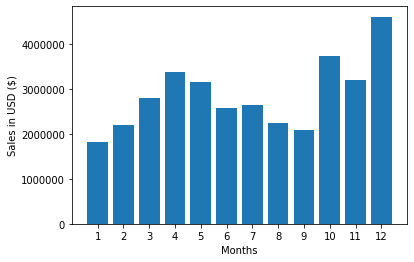

In [9]:
#Visualization
months = range(1,13)
plt.bar(months, results_Q1)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

December has the highest number of sales of $ 4,613,443.

January has the lowest number of sales of $ 1,822,257.

People usually make large numbers of purchases on December due to Christmas; thus they are not in need of purchasing more stuff in January.

### Question 2: What city had the highest & lowest number of sales?

#### Add City Column

In [10]:
# Add City column with city & state
def get_city(address):
    return address.split(', ')[1]
def get_state(address):
    return address.split(', ')[2].split(' ')[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Answer Question 2

In [11]:
# Find total sales of each city
results_Q2 = all_data.groupby('City')["Sales"].sum()
print(results_Q2)

City
Atlanta (GA)          2.795499e+06
Austin (TX)           1.819582e+06
Boston (MA)           3.661642e+06
Dallas (TX)           2.767975e+06
Los Angeles (CA)      5.452571e+06
New York City (NY)    4.664317e+06
Portland (ME)         4.497583e+05
Portland (OR)         1.870732e+06
San Francisco (CA)    8.262204e+06
Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64


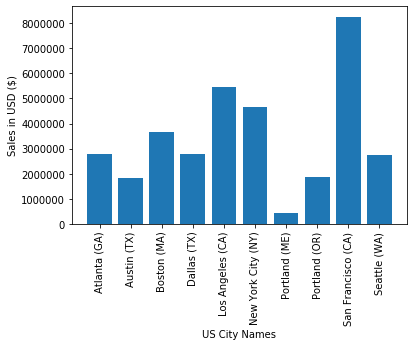

In [12]:
# Visualization
cities = [city for city, df in all_data.groupby(['City'])]
plt.bar(cities, results_Q2)
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('US City Names')
plt.ylabel('Sales in USD ($)')
plt.show()

San Francisco (CA) has the highest number of sales of $ 8,262,204.

Portland (ME) has the lowest number of sales of $ 449,758.

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product in order to increase sales for the lowest sales city above?

#### Convert Order Date into datetime object then add Hour & Minute Columns

In [13]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Answer Question 3

In [14]:
# Portland (ME) has the lowest sale -> Pull out dataframe of only Portland (ME)
plme_data = all_data[all_data["City"] == "Portland (ME)"]
plme_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
224,176773,AAA Batteries (4-pack),2,2.99,2019-04-25 20:07:00,"30 9th St, Portland, ME 04101",4,5.98,Portland (ME),20,7
337,176879,Flatscreen TV,1,300.00,2019-04-13 14:15:00,"370 Sunset St, Portland, ME 04101",4,300.00,Portland (ME),14,15
368,176909,Wired Headphones,1,11.99,2019-04-22 09:53:00,"692 Jackson St, Portland, ME 04101",4,11.99,Portland (ME),9,53
537,177072,iPhone,1,700.00,2019-04-01 13:11:00,"682 9th St, Portland, ME 04101",4,700.00,Portland (ME),13,11
708,177230,iPhone,1,700.00,2019-04-06 00:26:00,"16 River St, Portland, ME 04101",4,700.00,Portland (ME),0,26


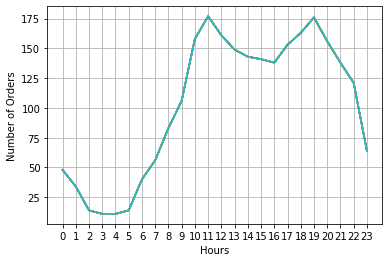

In [15]:
# Visualization
hours = [hour for hour, df in plme_data.groupby(["Hour"])]
plt.plot(hours, plme_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

There are two peaks hours where the number of orders in Portland (ME) are highest, which are at 11 PM and 7 PM.

It is understandable that these hours are usually when people are at break and afterwork; thus they have free time to make purchases.

### Question 4: What products are most often sold together?

#### Find items bought together as Group Product column

In [16]:
# Find orders with multiple items
order_df = all_data[all_data["Order ID"].duplicated(keep=False)]
order_df['Group Product'] = order_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates Group Product
order_df = order_df[['Order ID', 'Group Product']].drop_duplicates()
order_df.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Group Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Answer Question 4

In [17]:
count = Counter()

for row in order_df['Group Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Top 10 items bought to gether
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Iphone & Lightning Charging Cable are items most sold together.

### Question 5: What product sold the most? What are possible reasons for its highest number of orders?

#### Find each product number of orders

In [18]:
product_df = all_data.groupby('Product')
quantity_order = product_df.sum()["Quantity Ordered"]
print(quantity_order)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


#### Find out the most sold with visualization

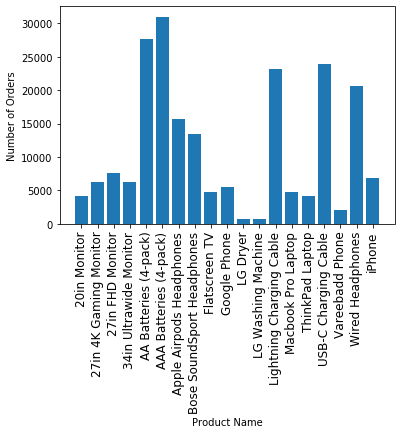

In [19]:
# Visualization
product = [prod for prod, df in all_data.groupby(['Product'])]
plt.bar(product, quantity_order)
plt.xticks(product, rotation = "vertical", size = 12)
plt.xlabel("Product Name")
plt.ylabel("Number of Orders")
plt.show()

AAA Batteries (4-pack) is the most sold product with 31017 orders. Speculated explanation is that it is cheap and essential to many other electronic devices.

#### Test the explanation of AAA Batteries (4-pack) being cheap thus having highest number of orders.

In [20]:
prices = all_data.groupby("Product").mean()["Price Each"]
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


#### Mapping two graphs to show relationship between number of orders and price of the product

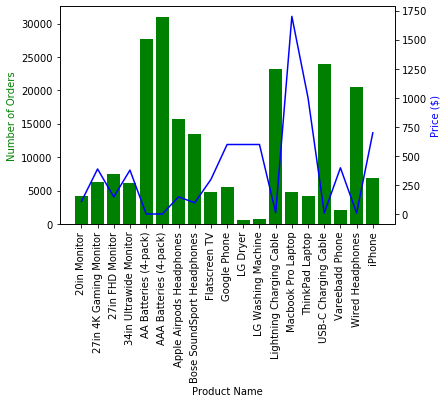

In [21]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_order, color = "g")
ax2.plot(product, prices, color = "b")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Number of Orders", color = "g")
ax2.set_ylabel("Price ($)", color ="b")
ax1.set_xticklabels(product, rotation = "vertical", size = 10)

plt.show()

Conclusion: Hypothesis tested as the cheaper the product, the higher number of orders

## Sale Analysis Portfolio - Hung "Eric" Tran - erictq96@gmail.com | 347-640-0319